In [29]:
# ライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import svm, metrics

<Figure size 1080x468 with 0 Axes>

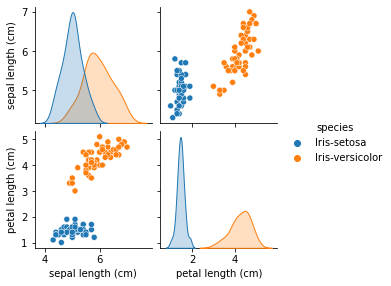

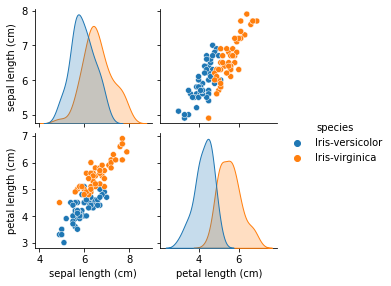

In [31]:
# irisデータ(csv形式)から読み込む
iris_df = pd.read_csv('iris.csv')
iris_df = iris_df[['sepal length (cm)', 'petal length (cm)', 'species']]

# setosa x versicolor のデータフレームを作成
iris_df_1 = iris_df[iris_df['species'] != 'Iris-virginica']
iris_data_1 = iris_df_1[['sepal length (cm)', 'petal length (cm)']]
iris_target_1 = iris_df_1['species']

# versicolor x virginica のデータフレームを作成
iris_df_2 = iris_df[iris_df['species'] != 'Iris-setosa']
iris_data_2 = iris_df_2[['sepal length (cm)', 'petal length (cm)']]
iris_target_2 = iris_df_2['species']

# ペアプロットを表示
plt.figure(figsize=(15, 6.5))
sns.pairplot(iris_df_1, hue='species', height=2)
sns.pairplot(iris_df_2, hue='species', height=2)

In [32]:
# setosa x versicolor について、線形SVMとカーネルSVM(ガウシアンカーネル)を作成して識別精度を確認
clf_1 = svm.SVC(kernel="linear")
clf_1 = clf_1.fit(iris_data_1, iris_target_1)
predict = clf_1.predict(iris_data_1)
print('linear SVM : accuracy_score', metrics.accuracy_score(iris_target_1, predict))
print('linear SVM : f1_score', metrics.f1_score(iris_target_1, predict, average="micro"))

clf_2 = svm.SVC(kernel="poly", degree=3)
clf_2 = clf_2.fit(iris_data_1, iris_target_1)
predict = clf_2.predict(iris_data_1)
print('poly SVM : accuracy_score', metrics.accuracy_score(iris_target_1, predict))
print('poly SVM : f1_score', metrics.f1_score(iris_target_1, predict, average="micro"))

clf_3 = svm.SVC(kernel="rbf", gamma='auto', C=1)
clf_3 = clf_3.fit(iris_data_1, iris_target_1)
predict = clf_3.predict(iris_data_1)
print('RBF SVM : accuracy_score', metrics.accuracy_score(iris_target_1, predict))
print('RBF SVM : f1_score', metrics.f1_score(iris_target_1, predict, average="micro"))

# clf_4 = svm.SVC(kernel="sigmoid", gamma='auto')
# clf_4 = clf_4.fit(iris_data_1, iris_target_1)
# predict = clf_4.predict(iris_data_1)
# print('sigmoid SVM : accuracy_score', metrics.accuracy_score(iris_target_1, predict))
# print('sigmoid SVM : f1_score', metrics.f1_score(iris_target_1, predict, average="micro"))

# clf_5 = svm.SVC(kernel="precomputed")
# clf_5 = clf_5.fit(iris_data_1, iris_target_1)
# predict = clf_5.predict(iris_data_1)
# print('precomputed SVM : accuracy_score', metrics.accuracy_score(iris_target_1, predict))
# print('precomputed SVM : f1_score', metrics.f1_score(iris_target_1, predict, average="micro"))

linear SVM : accuracy_score 1.0
linear SVM : f1_score 1.0
poly SVM : accuracy_score 1.0
poly SVM : f1_score 1.0
RBF SVM : accuracy_score 1.0
RBF SVM : f1_score 1.0


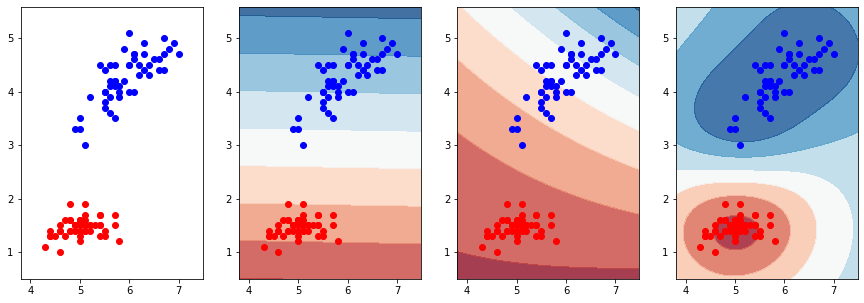

In [33]:
# 散布図表示のコード
x_min, x_max = iris_data_1['sepal length (cm)'].min() - 0.5, iris_data_1['sepal length (cm)'].max() + 0.5
y_min, y_max = iris_data_1['petal length (cm)'].min() - 0.5, iris_data_1['petal length (cm)'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
mesh_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['sepal length (cm)', 'petal length (cm)'])

figure = plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 4, 1)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal length (cm)'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal length (cm)'], c='blue')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax = plt.subplot(1, 4, 2)
Z = clf_1.decision_function(mesh_df)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal length (cm)'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal length (cm)'], c='blue')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax = plt.subplot(1, 4, 3)
Z = clf_2.decision_function(mesh_df)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal length (cm)'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal length (cm)'], c='blue')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax = plt.subplot(1, 4, 4)
Z = clf_3.decision_function(mesh_df)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal length (cm)'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal length (cm)'], c='blue')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# ax = plt.subplot(1, 5, 5)
# Z = clf_4.decision_function(mesh_df)
# Z = Z.reshape(xx.shape)
# ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
# ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal length (cm)'], 
#            iris_df_1[iris_df_1['species']=='Iris-setosa']['petal length (cm)'], c='red')
# ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal length (cm)'], 
#            iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal length (cm)'], c='blue')
# ax.set_xlim(xx.min(), xx.max())
# ax.set_ylim(yy.min(), yy.max())

# ax = plt.subplot(1, 6, 6)
# Z = clf_5.decision_function(mesh_df)
# Z = Z.reshape(xx.shape)
# ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
# ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal length (cm)'], 
#            iris_df_1[iris_df_1['species']=='Iris-setosa']['petal length (cm)'], c='red')
# ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal length (cm)'], 
#            iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal length (cm)'], c='blue')
# ax.set_xlim(xx.min(), xx.max())
# ax.set_ylim(yy.min(), yy.max())

plt.show()

In [28]:
# versicolor x virginica について、線形SVMとカーネルSVM(ガウシアンカーネル)を作成して識別精度を確認
clf_1 = svm.SVC(kernel="linear")
clf_1 = clf_1.fit(iris_data_2, iris_target_2)
predict = clf_1.predict(iris_data_2)
print('linear SVM : accuracy_score', metrics.accuracy_score(iris_target_2, predict))
print('linear SVM : f1_score', metrics.f1_score(iris_target_2, predict, average="micro"))

clf_2 = svm.SVC(kernel="poly", degree=3)
clf_2 = clf_2.fit(iris_data_2, iris_target_2)
predict = clf_2.predict(iris_data_2)
print('poly SVM : accuracy_score', metrics.accuracy_score(iris_target_2, predict))
print('poly SVM : f1_score', metrics.f1_score(iris_target_2, predict, average="micro"))

clf_3 = svm.SVC(kernel="rbf", gamma=3, C=1)
clf_3 = clf_3.fit(iris_data_2, iris_target_2)
predict = clf_3.predict(iris_data_2)
print('RBF SVM : accuracy_score', metrics.accuracy_score(iris_target_2, predict))
print('RBF SVM : f1_score', metrics.f1_score(iris_target_2, predict, average="micro"))

clf_4 = svm.SVC(kernel="sigmoid")
clf_4 = clf_4.fit(iris_data_2, iris_target_2)
predict = clf_4.predict(iris_data_2)
print('sigmoid SVM : accuracy_score', metrics.accuracy_score(iris_target_2, predict))
print('sigmoid SVM : f1_score', metrics.f1_score(iris_target_2, predict, average="micro"))

# clf_5 = svm.SVC(kernel="precomputed")
# clf_5 = clf_5.fit(iris_data_2, iris_target_2)
# predict = clf_5.predict(iris_data_2)
# print('RBF SVM : accuracy_score', metrics.accuracy_score(iris_target_2, predict))
# print('RBF SVM : f1_score', metrics.f1_score(iris_target_2, predict, average="micro"))

linear SVM : accuracy_score 0.93
linear SVM : f1_score 0.93
poly SVM : accuracy_score 0.95
poly SVM : f1_score 0.9500000000000001
RBF SVM : accuracy_score 0.95
RBF SVM : f1_score 0.9500000000000001
sigmoid SVM : accuracy_score 0.5
sigmoid SVM : f1_score 0.5


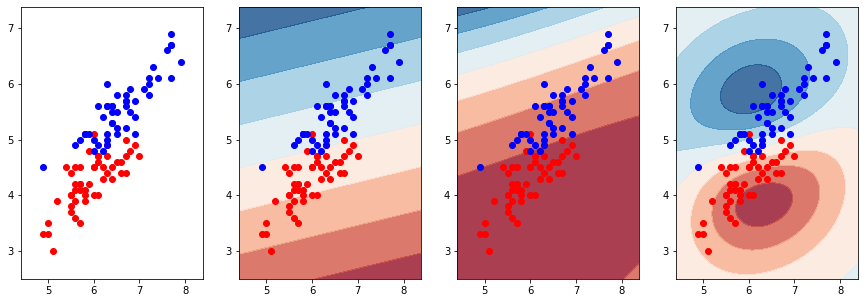

In [22]:
# 散布図表示のコード
x_min, x_max = iris_data_2['sepal length (cm)'].min() - 0.5, iris_data_2['sepal length (cm)'].max() + 0.5
y_min, y_max = iris_data_2['petal length (cm)'].min() - 0.5, iris_data_2['petal length (cm)'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
mesh_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['sepal length (cm)', 'petal length (cm)'])

figure = plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 4, 1)
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal length (cm)'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal length (cm)'], c='blue')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax = plt.subplot(1, 4, 2)
Z = clf_1.decision_function(mesh_df)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal length (cm)'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal length (cm)'], c='blue')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax = plt.subplot(1, 4, 3)
Z = clf_2.decision_function(mesh_df)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal length (cm)'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal length (cm)'], c='blue')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax = plt.subplot(1, 4, 4)
Z = clf_3.decision_function(mesh_df)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal length (cm)'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal length (cm)'], c='blue')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# ax = plt.subplot(1, 5, 5)
# Z = clf_4.decision_function(mesh_df)
# Z = Z.reshape(xx.shape)
# ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
# ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal length (cm)'], 
#            iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal length (cm)'], c='red')
# ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal length (cm)'], 
#            iris_df_2[iris_df_2['species']=='Iris-virginica']['petal length (cm)'], c='blue')
# ax.set_xlim(xx.min(), xx.max())
# ax.set_ylim(yy.min(), yy.max())

# ax = plt.subplot(1, 6, 6)
# Z = clf_5.decision_function(mesh_df)
# Z = Z.reshape(xx.shape)
# ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
# ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal length (cm)'], 
#            iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal length (cm)'], c='red')
# ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal length (cm)'], 
#            iris_df_2[iris_df_2['species']=='Iris-virginica']['petal length (cm)'], c='blue')
# ax.set_xlim(xx.min(), xx.max())
# ax.set_ylim(yy.min(), yy.max())

plt.show()

In [7]:
# irisデータ(csv形式)から読み込む 
iris_df = pd.read_csv('iris.csv')
# 4属性全てと品種をそれぞれ data, target とした setosa x versicolor のデータフレームを作成
iris_df_1 = iris_df[iris_df['species'] != 'Iris-virginica']
iris_data_full = iris_df[['sepal length (cm)', 'sepal length (cm)', 'petal length (cm)', 'petal length (cm)']]
iris_target_full = iris_df['species']

# 線形SVMとカーネルSVM(ガウシアンカーネル)を作成して識別精度を確認
clf_1 = svm.SVC(kernel="linear")
clf_1 = clf_1.fit(iris_data_full, iris_target_full)
predict = clf_1.predict(iris_data_full)
print('linear SVM : accuracy_score', metrics.accuracy_score(iris_target_full, predict))
print('linear SVM : f1_score', metrics.f1_score(iris_target_full, predict, average="micro"))

clf_2 = svm.SVC(kernel="rbf", gamma=50, C=1)
clf_2 = clf_2.fit(iris_data_full, iris_target_full)
predict = clf_2.predict(iris_data_full)
print('RBF SVM : accuracy_score', metrics.accuracy_score(iris_target_full, predict))
print('RBF SVM : f1_score', metrics.f1_score(iris_target_full, predict, average="micro"))

linear SVM : accuracy_score 0.96
linear SVM : f1_score 0.96
RBF SVM : accuracy_score 0.9933333333333333
RBF SVM : f1_score 0.9933333333333333
